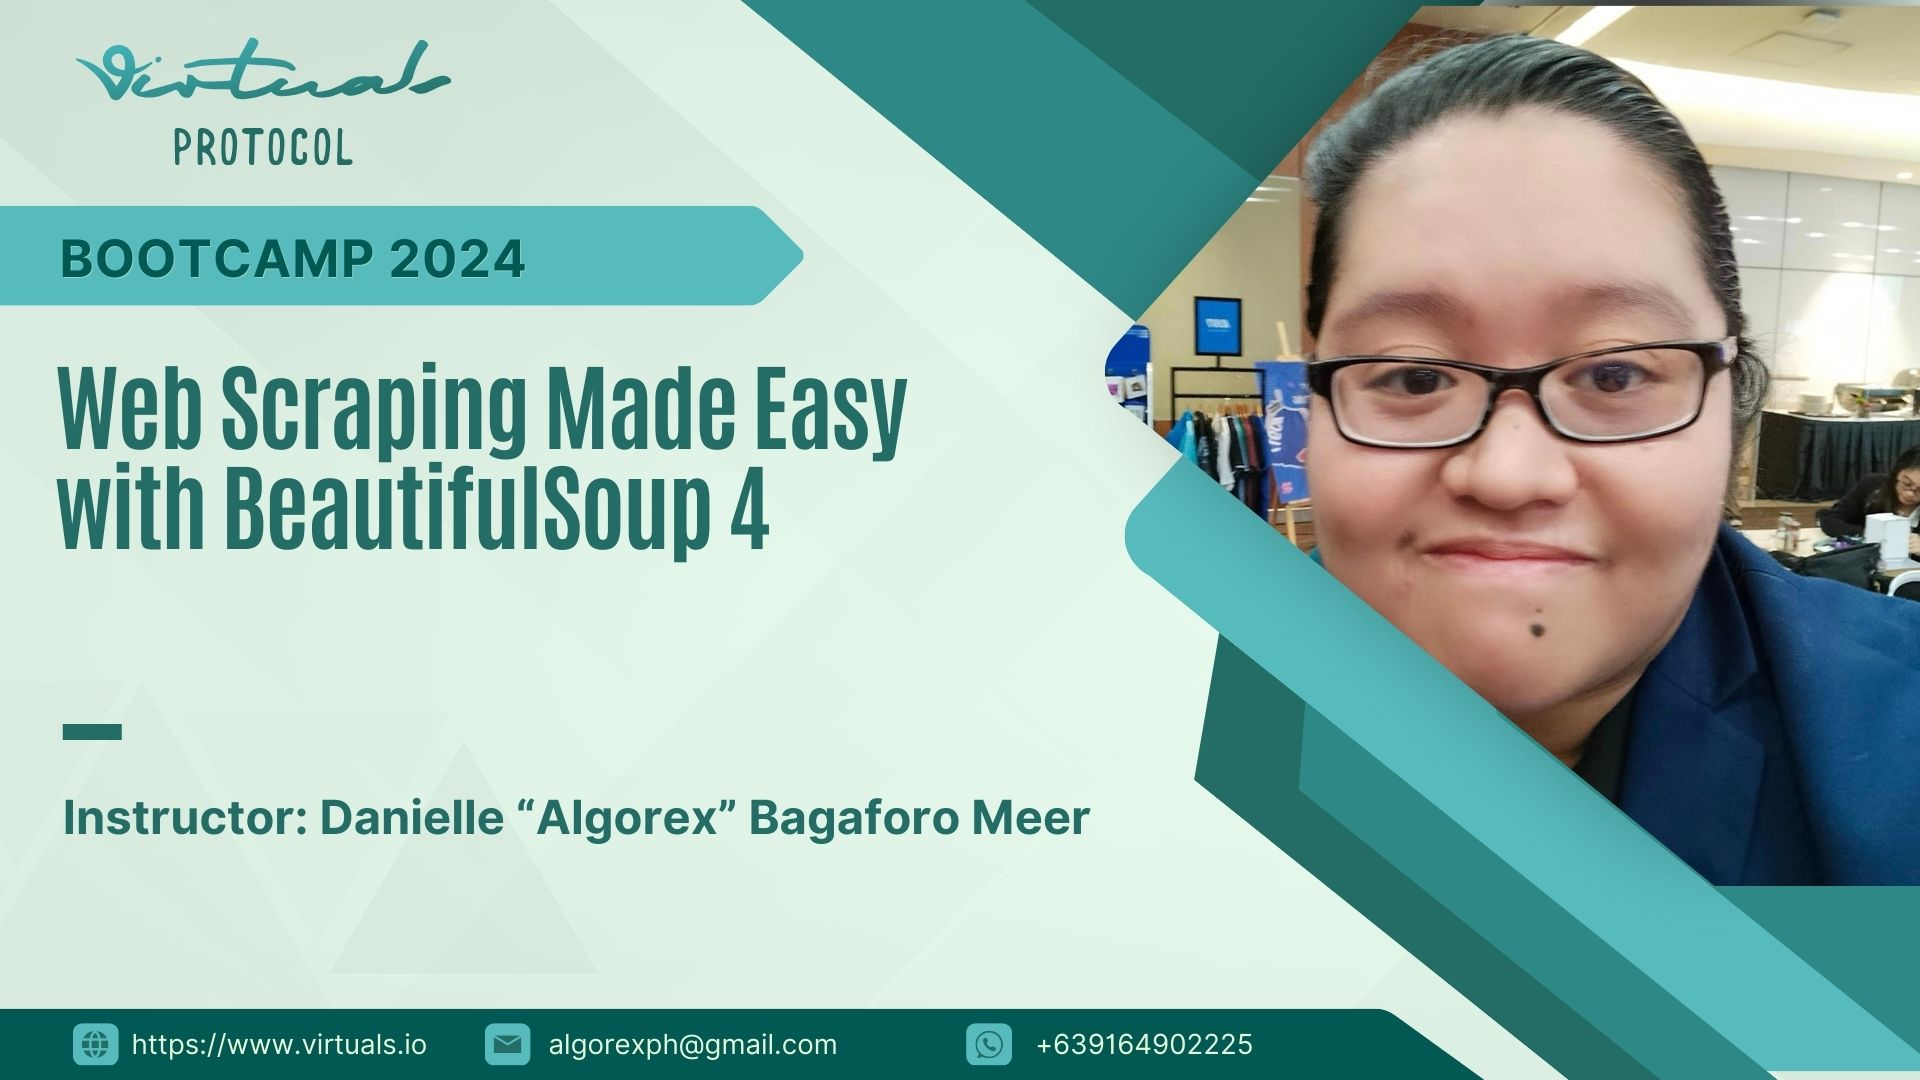

# Install the Following Packages :

In [ ]:
!pip install beautifulsoup4
!pip install requests
!pip install pandas

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv

# Links to Webscrape

In [ ]:
links = [
    'http://dnd5e.wikidot.com/spell:booming-blade',
     'http://dnd5e.wikidot.com/spell:dancing-lights',
     'http://dnd5e.wikidot.com/spell:eldritch-blast',
     'http://dnd5e.wikidot.com/spell:fire-bolt',
     'http://dnd5e.wikidot.com/spell:frostbite'
]

In [ ]:
Dataframed = pd.DataFrame(columns = ['Spell_Name', 'School_of_Magic', 'Spell_Level', 'Source', 'Casting_Time', 'Range', 'Components', 'Duration', 'Description', 'At_Higher_Levels', 'URL'])

In [ ]:
for x in range(0, len(links)):
    Row = []; # Container of Webscraped Info
    response = requests.get(links[x]) # Response 200 == OK
    html_content = response.content
    soup = BeautifulSoup(html_content, 'html.parser')

    # Spell_Name
    select_spell_name = soup.select('div[class*="page-title page-header"] span') # Selects all Nested Span tags of the Div Tag with the class = "page-title page-header"
    title = '\n'.join(selected.text for selected in select_spell_name)
    Row.append(title); # Spell_Name
    Row.append('Evocation') # School_of_Magic
    Row.append('Cantrip') # Spell_Level

    select_source = soup.select('div[id*="page-content"] p') # Selects all Nested p tags of the Div Tag with the id ="page-content"
    source = "\n".join(select_source[0].get_text(' ', strip=True)).replace("\n", "").lstrip('Source:')
    Row.append(source) # Source

    select_strong_text = soup.select('div[id*="page-content"] p strong') # Selects all Nested Strong tags of the Nested p tags of the Div Tag with the id "page-content"
    casting_time = "\n".join(select_strong_text[0].next_sibling).replace("\n", "")
    range_spell = "\n".join(select_strong_text[1].next_sibling).replace("\n", "")
    Components = "\n".join(select_strong_text[2].next_sibling).replace("\n", "")
    Duration = "\n".join(select_strong_text[3].next_sibling).replace("\n", "")
    Description = "\n".join(select_source[3].get_text(' ', strip=True)).replace("\n", "")
    At_Higher_Levels = "\n".join(select_strong_text[4].next_sibling).replace("\n", "")
    Row.append(casting_time) # Casting Time
    Row.append(range_spell) # Range
    Row.append(Components) # Components
    Row.append(Duration) # Duration
    Row.append(Description) # Duration
    if At_Higher_Levels == " " : Row.append("N/A") # At Higher Levels
    else : Row.append(At_Higher_Levels) # At Higher Levels
    Row.append(links[x]) # URL

    # Append Row to Data
    Dataframed.loc[len(Dataframed.index)] = Row

In [ ]:
Dataframed.head()

,Spell_Name,School_of_Magic,Spell_Level,Source,Casting_Time,Range,Components,Duration,Description,At_Higher_Levels,URL
0,Booming Blade,Evocation,Cantrip,Tasha's Cauldron of Everything,1 action,Self (5-foot radius),"S, M (a melee weapon worth at least 1 sp)",1 round,You brandish the weapon used in the spell’s ca...,"At 5th level, the melee attack deals an extra...",http://dnd5e.wikidot.com/spell:booming-blade
1,Dancing Lights,Evocation,Cantrip,Player's Handbook,1 action,120 feet,"V, S, M (a bit of phosphorus or wychwood, or ...","Concentration, up to 1 minute",You create up to four torch-sized lights withi...,N/A,http://dnd5e.wikidot.com/spell:dancing-lights
2,Eldritch Blast,Evocation,Cantrip,Player's Handbook,1 action,120 feet,"V, S",Instantaneous,A beam of crackling energy streaks toward a cr...,The spell creates more than one beam when you...,http://dnd5e.wikidot.com/spell:eldritch-blast
3,Fire Bolt,Evocation,Cantrip,Player's Handbook,1 action,120 feet,"V, S",Instantaneous,You hurl a mote of fire at a creature or objec...,This spell’s damage increases by 1d10 when yo...,http://dnd5e.wikidot.com/spell:fire-bolt
4,Frostbite,Evocation,Cantrip,Xanathar's Guide to Everything,1 action,60 feet,"V, S",Instantaneous,You cause numbing frost to form on one creatur...,The spell’s damage increases by 1d6 when you ...,http://dnd5e.wikidot.com/spell:frostbite


# CSV Dataset

In [ ]:
Dataframed.to_csv("DND_Spells.csv", index = False)

# Instruction Based Dataset

- To create an instruction-based dataset from this CSV file, we will format the data into a structure suitable for training or using in applications like chatbots or virtual assistants.

# Columns of Instruction Based Dataset
- Instruction = The Question or Prompt
- Output

In [ ]:
Instructions = pd.DataFrame(columns = ['Instruction', 'Output'])

# Questions

1. What is the casting time of the spell?
2. What is the range of the spell?
3. What is the duration of the spell?
4. Describe the spell
5.  What happens at higher levels for the spell?

# What is the casting time of the spell?

In [ ]:
for index, row in Dataframed.iterrows():
    instruction = "What is the casting time of " + row['Spell_Name'] + "?"
    output = row['Casting_Time']
    Instructions.loc[len(Instructions.index)] = [instruction, output]

In [ ]:
Instructions.head()

,Instruction,Output
0,What is the casting time of Booming Blade?,1 action
1,What is the casting time of Dancing Lights?,1 action
2,What is the casting time of Eldritch Blast?,1 action
3,What is the casting time of Fire Bolt?,1 action
4,What is the casting time of Frostbite?,1 action


# What is the range of the spell?

In [ ]:
for index, row in Dataframed.iterrows():
    instruction = "What is the range of " + row['Spell_Name'] + "?"
    output = row['Range']
    Instructions.loc[len(Instructions.index)] = [instruction, output]

# What is the duration of the spell?

In [ ]:
for index, row in Dataframed.iterrows():
    instruction = "What is the duration of " + row['Spell_Name'] + "?"
    output = row['Duration']
    Instructions.loc[len(Instructions.index)] = [instruction, output]

# Describe the spell

In [ ]:
for index, row in Dataframed.iterrows():
    instruction = "Describe the spell " + row['Spell_Name'] + "?"
    output = row['Description']
    Instructions.loc[len(Instructions.index)] = [instruction, output]

# What happens at higher levels for the spell?

In [ ]:
for index, row in Dataframed.iterrows():
    instruction = "What happens at higher levels for the spell " + row['Spell_Name'] + "?"
    output = row['At_Higher_Levels']
    if output == "N/A" : output = "This Spell cannot be casted in higher Levels."
    Instructions.loc[len(Instructions.index)] = [instruction, output]

In [ ]:
Instructions.to_json('DND_Instructions.json', orient="records")

# Knowledge Based Dataset

- A list of Facts that the Chatbot should know!

# Format of Facts

- The Casting Time of the Spell [Spell_Name] is [Casting_Time].
- The Range of the Spell [Spell_Name] is [Range].
- The Duration of the Spell [Spell_Name] is [Duration].
- When you cast the spell [Spell_Name], [Description].
- When you cast the spell [Spell_Name] at higher Levels, [At_Higher_Levels]

In [ ]:
Knowledge = pd.DataFrame(columns = ['Fact', 'URL'])

# The Casting Time of the Spell [Spell_Name] is [Casting_Time].

In [ ]:
for index, row in Dataframed.iterrows():
    fact = "The Casting Time of the Spell " + row['Spell_Name'] + " is" + row['Casting_Time'] + "."
    Knowledge.loc[len(Knowledge.index)] = [fact, row['URL']]

# The Range of the Spell [Spell_Name] is [Range].

In [ ]:
for index, row in Dataframed.iterrows():
    fact = "The Range of the Spell " + row['Spell_Name'] + " is" + row['Range'] + "."
    Knowledge.loc[len(Knowledge.index)] = [fact, row['URL']]

# The Duration of the Spell [Spell_Name] is [Duration].

In [ ]:
for index, row in Dataframed.iterrows():
    fact = "The Duration of the Spell " + row['Spell_Name'] + " is" + row['Duration'] + "."
    Knowledge.loc[len(Knowledge.index)] = [fact, row['URL']]

# When you cast the spell [Spell_Name], [Description].

In [ ]:
for index, row in Dataframed.iterrows():
    fact = "When you cast the Spell " + row['Spell_Name'] + "," + row['Description']
    Knowledge.loc[len(Knowledge.index)] = [fact, row['URL']]

# When you cast the spell [Spell_Name] at higher Levels, [At_Higher_Levels].

In [ ]:
for index, row in Dataframed.iterrows():
    if row['At_Higher_Levels'] == "N/A" :
      fact = "You Cannot cast the Spell " + row['Spell_Name'] + " at higher Levels."
    else :
      fact = "When you cast the Spell " + row['Spell_Name'] + " at higher levels," + row['At_Higher_Levels']
    Knowledge.loc[len(Knowledge.index)] = [fact, row['URL']]

In [ ]:
Knowledge.to_json('DND_Knowledge.json', orient="records")